In [6]:
import pickle

import numpy as np
from astropy import units as u
from nuance.star import Star

input = "../data/140212114/lc.fluxes"
data = pickle.load(open(input, "rb"))
star = Star(data['star_radius'], data['star_mass'], data['star_amplitude'], data['star_period'])
n = 20

min_period = 0.2
max_period = 10.0
max_snr = 30.
min_snr = 4.
# -----

dt = np.median(np.diff(data["time"]))
sigma = np.mean(data["error"])
radii = np.linspace(0.1, 50, 100000)
N = len(data["time"])

max_radius = star.min_radius(max_period, max_snr, N, sigma)
min_radius = star.min_radius(max_period, min_snr, N, sigma)

period_radius_grid = np.array(
    np.meshgrid(np.linspace(min_period, max_period, n), np.linspace(min_radius, max_radius, n))
)
period_radius = period_radius_grid.reshape(2, n * n)

In [7]:
import matplotlib.pyplot as plt

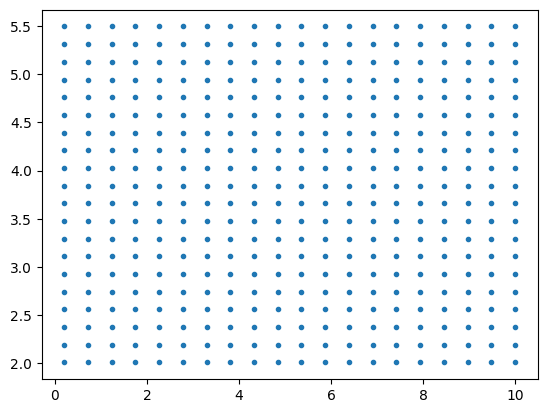

In [8]:
plt.plot(*period_radius, ".")

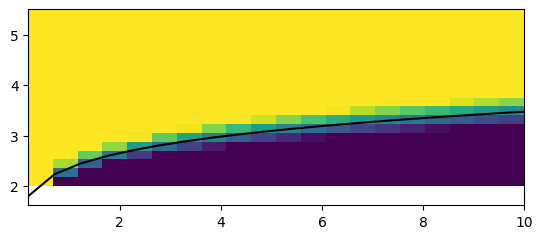

In [35]:
periods, radii = period_radius_grid
extent = (periods.min(), periods.max(), radii.min(), radii.max())
plt.imshow(star.snr(periods, radii, dt, N, sigma*2), vmin=5, vmax=7, origin="lower", extent=extent)

periods = np.linspace(min_period, max_period, n)
plt.plot(periods, star.min_radius(periods, 6, N, sigma*2), c="k")

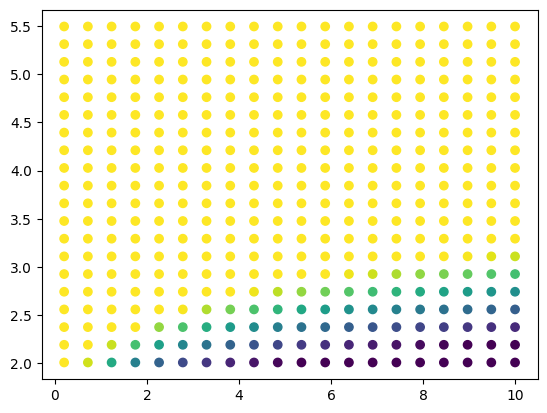

In [35]:
plt.scatter(periods.flatten(), radii.flatten(), c=star.snr(periods, radii, dt, N, sigma).flatten(), vmin=5, vmax=10)

In [20]:
radii

array([2.95342948e+03, 1.07183936e+02, 2.30581249e+01, 8.38854329e+00,
       3.94307296e+00, 2.15833149e+00, 1.30701908e+00, 8.50556427e-01,
       5.84153333e-01, 4.18341824e-01, 3.09790577e-01, 2.35769738e-01,
       1.83571707e-01, 1.45712051e-01, 1.17586955e-01, 9.62584286e-02,
       7.97914380e-02, 6.68761377e-02, 5.66043507e-02, 4.83329073e-02,
       4.15976413e-02, 3.60578623e-02, 3.14596724e-02, 2.76112276e-02,
       2.43657407e-02, 2.16096033e-02, 1.92539560e-02, 1.72286197e-02,
       1.54776702e-02, 1.39561713e-02, 1.26277364e-02, 1.14626891e-02,
       1.04366631e-02, 9.52952559e-03, 8.72454370e-03, 8.00773283e-03,
       7.36734422e-03, 6.79345877e-03, 6.27766303e-03, 5.81278921e-03,
       5.39270517e-03, 5.01214402e-03, 4.66656490e-03, 4.35203891e-03,
       4.06515499e-03, 3.80294199e-03, 3.56280392e-03, 3.34246580e-03,
       3.13992828e-03, 2.95342948e-03])

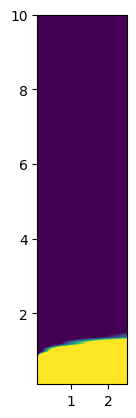

In [36]:
taus = np.linspace(0.1, 2.5)
deltas = np.linspace(0.1, 10)
taus_deltas_grid = np.array(np.meshgrid(taus, deltas))
extent = (taus.min(), taus.max(), deltas.min(), deltas.max())
periods = star.tau2period(taus_deltas_grid[0])
radii = star.tau2period(taus_deltas_grid[1])
plt.imshow(star.snr(periods, radii, dt, N, sigma), vmin=5, vmax=10, origin="lower", extent=extent)

In [6]:
period_radius_grid

array([[[ 0.2       ,  0.71578947,  1.23157895,  1.74736842,
          2.26315789,  2.77894737,  3.29473684,  3.81052632,
          4.32631579,  4.84210526,  5.35789474,  5.87368421,
          6.38947368,  6.90526316,  7.42105263,  7.93684211,
          8.45263158,  8.96842105,  9.48421053, 10.        ],
        [ 0.2       ,  0.71578947,  1.23157895,  1.74736842,
          2.26315789,  2.77894737,  3.29473684,  3.81052632,
          4.32631579,  4.84210526,  5.35789474,  5.87368421,
          6.38947368,  6.90526316,  7.42105263,  7.93684211,
          8.45263158,  8.96842105,  9.48421053, 10.        ],
        [ 0.2       ,  0.71578947,  1.23157895,  1.74736842,
          2.26315789,  2.77894737,  3.29473684,  3.81052632,
          4.32631579,  4.84210526,  5.35789474,  5.87368421,
          6.38947368,  6.90526316,  7.42105263,  7.93684211,
          8.45263158,  8.96842105,  9.48421053, 10.        ],
        [ 0.2       ,  0.71578947,  1.23157895,  1.74736842,
          2.26315789,

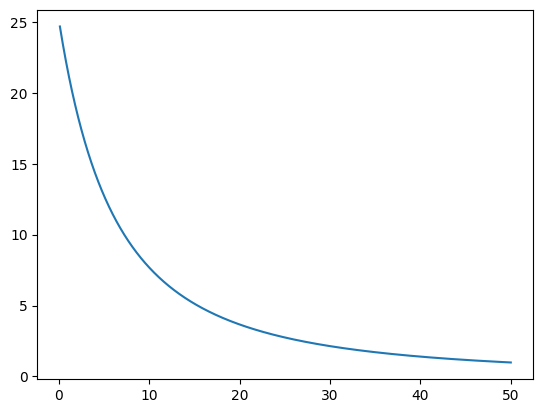

In [11]:
import matplotlib.pyplot as plt

plt.plot(radii, star.radius2delta(np.linspace(1., 5, 100000)))

In [4]:
# tests

from nuance.utils import convert_parameters

In [5]:
tau_delta, period_radius, _ = convert_parameters(data['star_radius'], data['star_mass'], data['star_amplitude'], data['star_period'])

In [6]:
tau_delta(1, 1)

(1.4347476940242443, 49.34247421359628)

In [7]:
period_radius(1, 1)

(2.953429484714177, 7.024419848898291)

In [8]:
star.planet_radius(1)

7.024419848898292

In [9]:
import astropy.units as u
import astropy.constants as c

In [10]:
c.G.to(u.R_sun**3/u.M_sun/(u.day**2)).value

2942.2062175044193

In [11]:
u.R_sun**3/u.M_sun/(u.day**2)

Unit("solRad3 / (d2 solMass)")

In [12]:
u.day**2

Unit("d2")

In [13]:
c.R_earth.to(u.R_sun).value

0.009167888457668534

In [14]:
R_EARTH.value

NameError: name 'R_EARTH' is not defined

In [ ]:
R_EARTH

In [ ]:
c.G.to(u.R_sun**3/u.M_sun/(u.day**2))

In [ ]:
min_radius

In [ ]:
max_delta

In [ ]:
params.T

In [ ]:
physical_params.T